# DBTL 7 data analysis

This notebook analyzes OD340 data from DBTL cycle 7 of a flaviolin producing P. putida.

## Inputs and outputs

#### Required file to run this notebook:
   - edd slug


#### File generated by running this notebook:
   
 
    
The files are stored in the user defined directory.

## Setup

Importing needed libraries:

In [1]:
import sys
sys.path.append('../')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl
from sklearn.metrics import r2_score

import edd_utils as eddu

In [2]:
from art.core import *
# import art.plot as plot

/usr/local/art/.venv/lib/python3.11/site-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


### User parameters

In [3]:
CYCLE = 6.1

user_params = {
    'output_file_path': f'../flaviolin data/DBTL{CYCLE}', # Folder for output files,
    'bounds_file': f'../flaviolin data/Putida_media_bounds_extended.csv',
    'study_slug': 'combinatorial-media-for-flaviolin-repeats-dbtl-61',
    'edd_server': 'edd.jbei.org',
    'username': 'azournas',
    } 

In [4]:
study_slug = user_params['study_slug']
edd_server = user_params['edd_server']
username = user_params['username']

## Load the study

In [5]:
try:
  session = eddu.login(edd_server=edd_server, user=username)
except:
  print('ERROR! Connection to EDD failed. We will try to load data from disk...')
else:
  print('OK! Connection to EDD successful. We will try to load data from EDD...')

Password for azournas:  ········


OK! Connection to EDD successful. We will try to load data from EDD...


In [6]:
df: pd.DataFrame
    
try:
    df = eddu.export_study(session, study_slug, edd_server=edd_server)
except (NameError, AttributeError, KeyError):
    try:
        df = pd.read_csv(user_params['study_file'])
    except:
        print(f'ERROR! Alternative loading of data from disk failed!')
    else:
        print(f'OK! Alternative loading of data from disk was successful.')


  0%|          | 0/48 [00:00<?, ?it/s]

In [7]:
df

,Study ID,Study Name,Line ID,Replicate Key,Line Name,Line Description,Protocol,Assay ID,Assay Name,Formal Type,Measurement Type,Compartment,Units,Value,Hours
0,205698,Combinatorial media for flaviolin repeats DBTL...,205699,2e83793b-af9c-485f-950c-d6ea67bc2f39,C6.1_WA1_C1-R1,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,205747,C6.1_WA1_C1-R1,NaN,OD340,0,NaN,0.0691,48.0
1,205698,Combinatorial media for flaviolin repeats DBTL...,205700,7a380d8e-8e4d-437b-8ca6-cdd4aa6665bc,C6.1_WA1_C1-R2,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,205748,C6.1_WA1_C1-R2,NaN,OD340,0,NaN,0.0657,48.0
2,205698,Combinatorial media for flaviolin repeats DBTL...,205701,c4a7bb42-72cb-445b-86fc-d356566b7c51,C6.1_WA1_C1-R3,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,205749,C6.1_WA1_C1-R3,NaN,OD340,0,NaN,0.0603,48.0
3,205698,Combinatorial media for flaviolin repeats DBTL...,205702,33cbbeb5-5f27-4cf9-a646-98e87eb91919,C6.1_WD1_F1-R1,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,205750,C6.1_WD1_F1-R1,NaN,OD340,0,NaN,0.0516,48.0
4,205698,Combinatorial media for flaviolin repeats DBTL...,205703,22879874-3710-4aa4-96e0-6d90d89a370a,C6.1_WD1_F1-R2,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,205751,C6.1_WD1_F1-R2,NaN,OD340,0,NaN,0.0488,48.0
5,205698,Combinatorial media for flaviolin repeats DBTL...,205704,87538c36-7c86-46c6-8f15-6bcfd01953ef,C6.1_WD1_F1-R3,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,205752,C6.1_WD1_F1-R3,NaN,OD340,0,NaN,0.0448,48.0
6,205698,Combinatorial media for flaviolin repeats DBTL...,205705,6e43cb32-6b36-40c9-a2a8-7482e2e13ad1,C6.1_WA2_C2-R1,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,205753,C6.1_WA2_C2-R1,NaN,OD340,0,NaN,0.4607,48.0
7,205698,Combinatorial media for flaviolin repeats DBTL...,205706,6b9b51a0-3bd3-48b3-8cc2-1c207d7e5c64,C6.1_WA2_C2-R2,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,205754,C6.1_WA2_C2-R2,NaN,OD340,0,NaN,0.4180,48.0
8,205698,Combinatorial media for flaviolin repeats DBTL...,205707,d49be45e-9b2b-45fe-b1ff-ced2858e18ef,C6.1_WA2_C2-R3,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,205755,C6.1_WA2_C2-R3,NaN,OD340,0,NaN,0.4200,48.0
9,205698,Combinatorial media for flaviolin repeats DBTL...,205708,0cbfa225-ab22-4cf5-aa84-41717909cdfa,C6.1_WD2_F2-R1,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,205756,C6.1_WD2_F2-R1,NaN,OD340,0,NaN,0.4379,48.0


Drop unnecessary columns:

In [8]:
df = df.loc[:,['Line Name','Line Description','Measurement Type','Value']]
df.head()

,Line Name,Line Description,Measurement Type,Value
0,C6.1_WA1_C1-R1,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.0691
1,C6.1_WA1_C1-R2,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.0657
2,C6.1_WA1_C1-R3,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.0603
3,C6.1_WD1_F1-R1,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.0516
4,C6.1_WD1_F1-R2,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.0488


In [9]:
find_col = lambda x: x['Line Name'][7]

def find_row(row):
    line_name = row['Line Name']
    if line_name[6] == 'A':
        if int(line_name[-1]) == 1:
            return "A"
        elif int(line_name[-1]) == 2:
            return "B"
        else:
            return "C"
    else:
        if int(line_name[-1]) == 1:
            return "D"
        elif int(line_name[-1]) == 2:
            return "E"
        else:
            return "F"


In [10]:
df['Row'] =  df.apply(find_row, axis=1)
df['Column'] =  df.apply(find_col, axis=1)


In [11]:
df

,Line Name,Line Description,Measurement Type,Value,Row,Column
0,C6.1_WA1_C1-R1,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.0691,A,1
1,C6.1_WA1_C1-R2,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.0657,B,1
2,C6.1_WA1_C1-R3,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.0603,C,1
3,C6.1_WD1_F1-R1,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.0516,D,1
4,C6.1_WD1_F1-R2,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.0488,E,1
5,C6.1_WD1_F1-R3,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.0448,F,1
6,C6.1_WA2_C2-R1,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.4607,A,2
7,C6.1_WA2_C2-R2,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.4180,B,2
8,C6.1_WA2_C2-R3,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.4200,C,2
9,C6.1_WD2_F2-R1,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.4379,D,2


## Coefficient of variation

In [46]:
df_red = df.drop(columns=['Column'])
stats = df_red.groupby(['Measurement Type', 'Line Description']).mean()
stats.rename(columns={'Value': 'mean'}, inplace=True)
stats['std'] = df_red.groupby(['Measurement Type', 'Line Description']).std()
stats['CV[%]'] = 100* stats['std'] / stats['mean']
stats

TypeError: Could not convert C5.1_WD8_F8-R1C5.1_WD8_F8-R2C5.1_WD8_F8-R3 to numeric

In [ ]:
print("Mean coefficient of variation for OD340:")
np.mean(stats.loc['OD340','CV[%]'])

## Visualization

/tmp/ipykernel_165/1875209016.py:5: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(data=df,


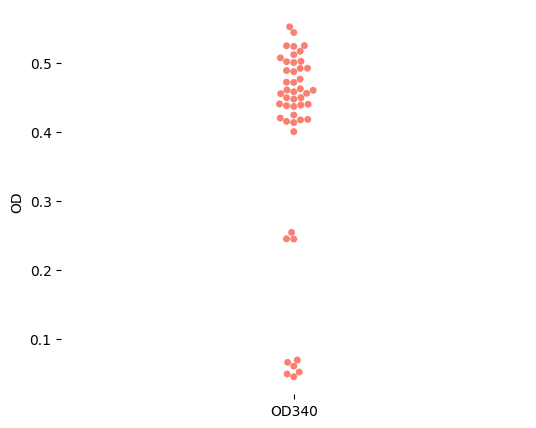

In [12]:
fig, ax = plt.subplots(figsize=(6, 5))
fontsize = 16
sns.set(font_scale = 1.5)
sns.set_style("whitegrid")
sns.swarmplot(data=df, 
              linewidth=0,
              x='Measurement Type',
              y='Value',
              palette="dark:salmon_r"
              )
sns.despine(left=True, bottom=True)
ax.set(xlabel=None, ylabel="OD")

fig.savefig(
    f"{user_params['output_file_path']}/swarm_both.png",
    transparent=False,
    bbox_inches="tight",
    dpi=300,
)

Per line:

In [13]:
line_names = []
df_340 = df[df['Measurement Type']=='OD340'].reset_index()
for i in range(int(len(df_340)/3)):
    line_names.append(str(df_340['Line Name'][3*i])[3:-3])
# line_names

/tmp/ipykernel_165/2548742498.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(line_names, fontsize=8, rotation = 30)


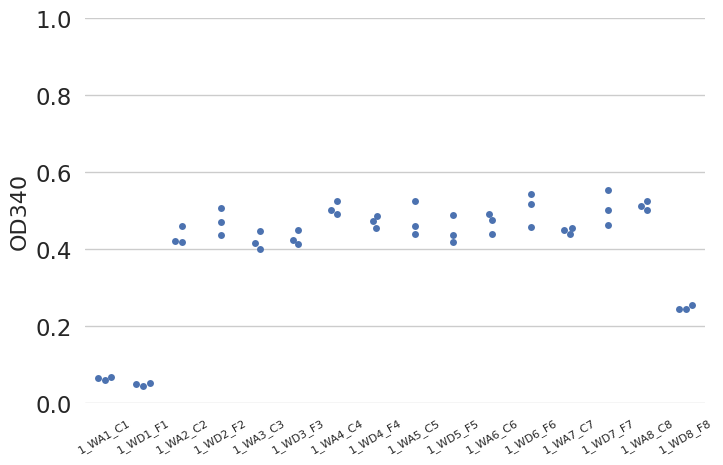

In [14]:
fig, ax = plt.subplots(figsize=(8, 5))
fontsize = 14
sns.set_style("whitegrid")
g = sns.swarmplot(data=df, 
              linewidth=0,
              x='Line Description',
              y='Value',
              # hue='Measurement Type',
              # palette="dark:salmon_r",
              )
g.set_xticklabels(line_names, fontsize=8, rotation = 30)
# plt.legend(fontsize=fontsize)
sns.despine(left=True, bottom=True)
ax.set_ylabel("OD340", fontsize=fontsize+2)
ax.set_xlabel(None)
plt.ylim([0, 1.])

fig.savefig(
    f"{user_params['output_file_path']}/swarm_per_design.png",
    transparent=False,
    bbox_inches="tight",
    dpi=300,
)

In [15]:
df

,Line Name,Line Description,Measurement Type,Value,Row,Column
0,C6.1_WA1_C1-R1,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.0691,A,1
1,C6.1_WA1_C1-R2,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.0657,B,1
2,C6.1_WA1_C1-R3,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.0603,C,1
3,C6.1_WD1_F1-R1,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.0516,D,1
4,C6.1_WD1_F1-R2,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.0488,E,1
5,C6.1_WD1_F1-R3,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.0448,F,1
6,C6.1_WA2_C2-R1,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.4607,A,2
7,C6.1_WA2_C2-R2,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.4180,B,2
8,C6.1_WA2_C2-R3,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.4200,C,2
9,C6.1_WD2_F2-R1,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.4379,D,2


### Plot OD measurements per well

In [16]:
data_od340 = df[df['Measurement Type']=='OD340'].pivot(index = 'Row', columns = 'Column',values = 'Value')

In [17]:
data_od340.head(6)

Column,1,2,3,4,5,6,7,8
Row,,,,,,,,
A,0.0691,0.4607,0.4475,0.5239,0.5249,0.4923,0.4390,0.5251
B,0.0657,0.4180,0.4151,0.5006,0.4603,0.4400,0.4559,0.5120
C,0.0603,0.4200,0.4003,0.4920,0.4405,0.4765,0.4496,0.5018
D,0.0516,0.4379,0.4135,0.4554,0.4174,0.4581,0.4625,0.2446
E,0.0488,0.4717,0.4244,0.4721,0.4368,0.5169,0.5023,0.2542
F,0.0448,0.5073,0.4495,0.4873,0.4889,0.5441,0.5524,0.2449


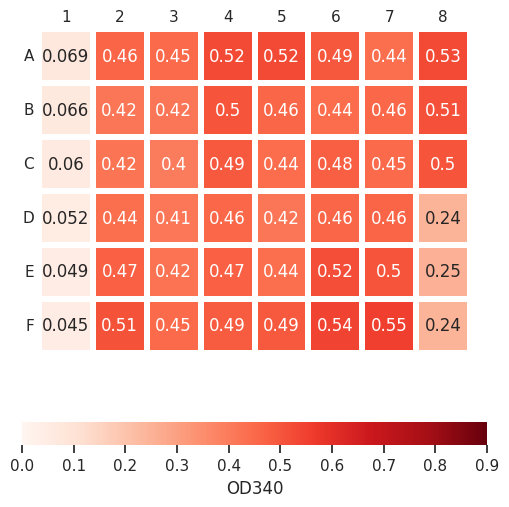

In [18]:
fig = plt.figure(figsize=(10,6))
colormap = sns.color_palette("light:salmon", as_cmap=True)
colormap = "Reds"
sns.set_context("notebook", font_scale=1., rc={"lines.linewidth": 2.5})
ax = sns.heatmap(data_od340, 
                 linewidths=3, 
                 linecolor="w",
                 square= True,
                 cmap=colormap,
                 cbar_kws={"orientation": "horizontal",
                           "shrink": 0.6,
                           'label': 'OD340'
                          },
                 annot = True,
                 vmin=0, 
                 vmax=.9
                )
ax.set(xlabel=None, ylabel=None)
plt.yticks(rotation=0)
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.xaxis.tick_top()
fig.savefig(
    f"{user_params['output_file_path']}/OD340.png",
    transparent=False,
    bbox_inches="tight",
    dpi=300,
)

### Load training data and predictions for recommendations:

In [19]:
user_params['target_designs'] = f"{user_params['output_file_path']}/target_concentrations.csv"

In [20]:
designs_pred = pd.read_csv(user_params['target_designs'], index_col=0).reset_index()
designs_pred.drop(columns='Well', inplace=True)
designs_pred['OD340'] = df[df['Measurement Type']=='OD340']['Value'].values
designs_pred.head()

,H3BO3[mM],K2SO4[mM],K2HPO4[mM],FeSO4[mM],NH4Cl[mM],MgCl2[mM],NaCl[mM],(NH4)6Mo7O24[mM],CoCl2[mM],CuSO4[mM],MnSO4[mM],ZnSO4[mM],OD340_pred,OD340_std,Label,OD340
0,0.018833,0.557771,0.479914,0.073016,15.011862,0.039553,662.711937,0.000262,0.002831,0.001193,0.000733,0.00004,0.49644,0.099114,explore,0.0691
1,0.018833,0.557771,0.479914,0.073016,15.011862,0.039553,662.711937,0.000262,0.002831,0.001193,0.000733,0.00004,0.49644,0.099114,explore,0.0657
2,0.018833,0.557771,0.479914,0.073016,15.011862,0.039553,662.711937,0.000262,0.002831,0.001193,0.000733,0.00004,0.49644,0.099114,explore,0.0603
3,0.018298,0.557728,0.479902,0.071367,15.011862,0.039414,662.711936,0.000265,0.002673,0.001118,0.001638,0.00001,0.49531,0.099055,explore,0.0516
4,0.018298,0.557728,0.479902,0.071367,15.011862,0.039414,662.711936,0.000265,0.002673,0.001118,0.001638,0.00001,0.49531,0.099055,explore,0.0488


In [21]:
user_params['train_data'] = f'../flaviolin data/DBTL{CYCLE}/train_pred.csv'

In [22]:
train_pred = pd.read_csv(user_params['train_data'], index_col=0)
train_pred['Label'] = 'train'
# train_pred.loc[train_pred['NaCl[mM]'].between(45, 55), 'Label'] = 'standard'

In [23]:
# train_pred[train_pred['NaCl[mM]'] > 45 & train_pred['NaCl[mM]'] < 55]
# train_pred.loc[train_pred['NaCl[mM]'].between(45, 55), 'Label']

In [24]:
def predictions_vs_observations(
    designs,
    train,
    errorbars_flag=False,
    xlim=None,
    ylim=None,
):
    
    plt.style.use("seaborn-white")

    fontsize = 20

    fig, ax = plt.subplots(figsize=(7, 7))
    
    obs_all = np.append(train['OD340'], designs['OD340'])
    pred_all = np.append(train['OD340_cv_pred'], designs['OD340_pred'])
    pred_std_all = np.append(train['OD340_cv_std'], designs['OD340_std'])
   
    
    # Plot Scatter Plot
    if errorbars_flag:
        plt.errorbar(
            obs_all,
            pred_all,
            yerr=1.96 * pred_std_all,
            fmt='none',
            ecolor="lightgray",
            elinewidth=1,
            alpha=0.5,
            zorder=0
        )
            
    plt.scatter(
        train['OD340'], 
        train['OD340_cv_pred'], 
        color="gray",
        label='train'
    )

    standard = train[train['Label']=='standard']
    plt.scatter(
        standard['OD340'], 
        standard['OD340_cv_pred'],
        label='standard',
        color="k"
    )
    
    # standard_des = designs[designs['Label']=='standard']
    # plt.scatter(standard_des['OD340'], standard_des['OD340_pred'], color="k")
    
    exploit_des = designs[designs['Label']=='exploit']
    plt.scatter(
        exploit_des['OD340'], 
        exploit_des['OD340_pred'], 
        color="orangered",
        label='exploitation'
    )
    
    explore_des = designs[designs['Label']=='explore']
    plt.scatter(
        explore_des['OD340'], 
        explore_des['OD340_pred'], 
        color="orange",
        label='exploration'
    )
    
    r2_train = round(r2_score(train['OD340'], train['OD340_cv_pred']), 2)
    
    r2_all = round(r2_score(obs_all, pred_all), 2)

    ax.set_title(f"$R^2$={r2_train}", fontsize=fontsize)
    
    print(f"$R^2$={r2_all}")
    ax.set_xlabel("Observations", fontsize=fontsize)
    ax.set_ylabel("Cross-validation predictions", fontsize=fontsize)

    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]

    if xlim is None:
        ax.set_xlim(lims)
    else:
        ax.set_xlim(xlim)

    if ylim is None:
        ax.set_ylim(lims)
    else:
        ax.set_ylim(ylim)

    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]

    # Plot Diagonal Dashed Line
    ax.plot(lims, lims, ls="--", color=".8", zorder=0)
    
    plt.legend(loc='best', 
               fontsize=fontsize-4)

    plt.tick_params(axis="both", which="major", labelsize=fontsize)
    plt.show()

    fig.savefig(
        user_params['output_file_path']
        + "/predictions_vs_observations.png",
        bbox_inches="tight",
        transparent=False,
        dpi=300,
    )

    plt.close(fig)

$R^2$=0.12


/tmp/ipykernel_165/1004933420.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-white")


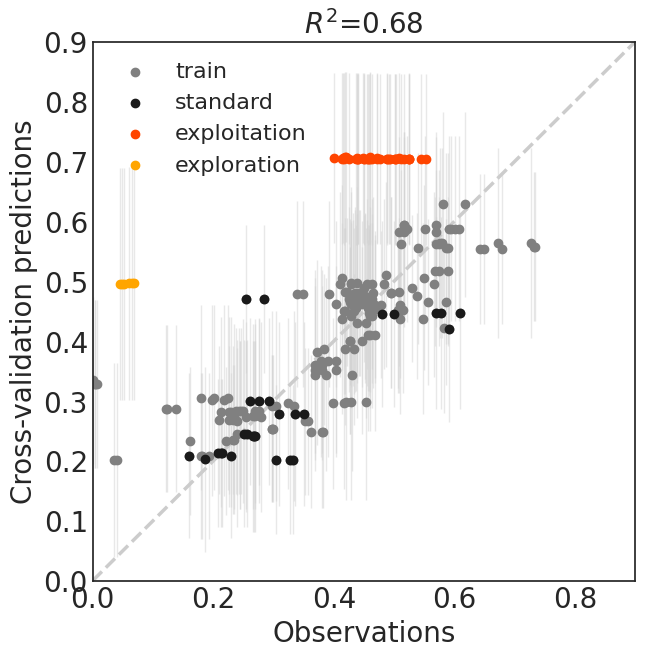

In [29]:
predictions_vs_observations(
    designs=designs_pred,
    train=train_pred,
    errorbars_flag=True,
    xlim=[0., 0.9],
    ylim=[0., 0.9],
)

In [36]:
train_pred['Label'] = 'train'
train_pred.loc[train_pred['NaCl[mM]'].between(45, 55) & train_pred['H3BO3[mM]'].between(0.0038, 0.0045), 'Label'] = 'standard'

$R^2$=0.12


/tmp/ipykernel_165/1004933420.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-white")


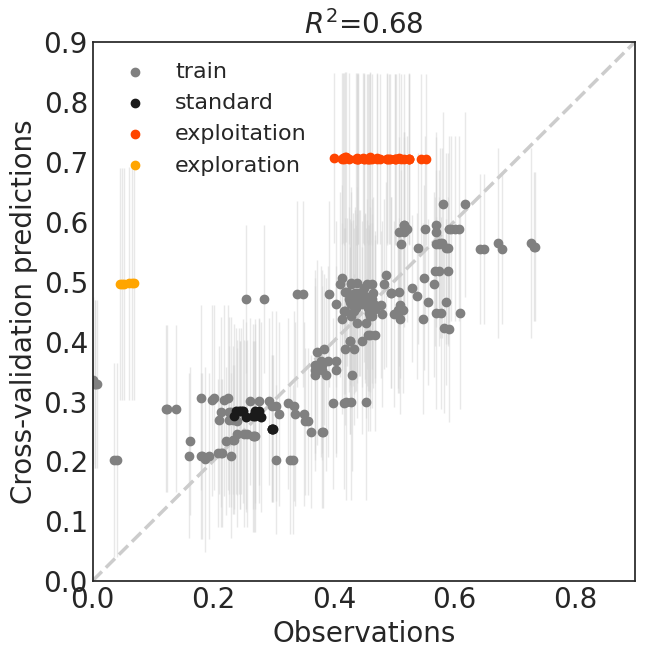

In [37]:
predictions_vs_observations(
    designs=designs_pred,
    train=train_pred,
    errorbars_flag=True,
    xlim=[0., 0.9],
    ylim=[0., 0.9],
)

## Inspect designs

In [43]:
df_all = train_pred.drop(
    columns=['OD340_pred','OD340_std', 'OD340_cv_pred', 'OD340_cv_std']
)
df_all = pd.concat([df_all,
    designs_pred]).drop(
        columns=['OD340_pred','OD340_std']
).reset_index(drop=True)

In [44]:
# df_all['OD340_yield'] = df_all['OD340']

In [45]:
df_all.head()

,H3BO3[mM],K2SO4[mM],K2HPO4[mM],FeSO4[mM],NH4Cl[mM],MgCl2[mM],NaCl[mM],(NH4)6Mo7O24[mM],CoCl2[mM],CuSO4[mM],MnSO4[mM],ZnSO4[mM],OD340,Label
0,0.019871,0.205718,2.365080,0.021243,6.375749,4.320423,21.652901,0.000023,0.001306,0.0001,0.0008,0.0001,0.2076,train
1,0.019871,0.205718,2.365080,0.021243,6.375749,4.320423,21.652901,0.000023,0.001306,0.0001,0.0008,0.0001,0.2149,train
2,0.019871,0.205718,2.365080,0.021243,6.375749,4.320423,21.652901,0.000023,0.001306,0.0001,0.0008,0.0001,0.2124,train
3,0.003918,1.883663,0.799089,0.009532,8.860595,3.425574,15.010088,0.000102,0.000255,0.0001,0.0008,0.0001,0.1859,train
4,0.000928,0.114704,0.749104,0.024392,8.910734,3.278069,39.314072,0.000245,0.001165,0.0001,0.0008,0.0001,0.2294,train


In [46]:
titer_max_ind = df_all['OD340'].nlargest(3).index
df_all.loc[titer_max_ind]

,H3BO3[mM],K2SO4[mM],K2HPO4[mM],FeSO4[mM],NH4Cl[mM],MgCl2[mM],NaCl[mM],(NH4)6Mo7O24[mM],CoCl2[mM],CuSO4[mM],MnSO4[mM],ZnSO4[mM],OD340,Label
194,0.021665,0.716594,2.211578,0.058865,16.808802,0.379974,460.093519,0.000246,0.002152,0.001374,0.003696,0.000377,0.7337,train
193,0.021665,0.716594,2.211578,0.058865,16.808802,0.379974,460.093519,0.000246,0.002152,0.001374,0.003696,0.000377,0.7316,train
189,0.015919,0.229308,2.598355,0.060683,10.860956,0.374061,493.688987,0.000186,0.002130,0.001261,0.000849,0.000152,0.7271,train


In [47]:
yield_max_ind = df_all['OD340_yield'].nlargest(1).index
df_all.loc[yield_max_ind]

KeyError: 'OD340_yield'

In [48]:
df_all.loc[int((yield_max_ind).values):int((yield_max_ind).values)+2]

NameError: name 'yield_max_ind' is not defined

In [116]:
titer_max = df_all.loc[titer_max_ind]['OD340'].mean()
yield_max = (
    df_all.loc[int((yield_max_ind).values):int((yield_max_ind).values)+2]['OD340_yield']
).mean()

In [117]:
titer_max, yield_max

(0.7642000000000001, 0.03316666666666667)

In [119]:
titer_standard = df_all[df_all['Label']=='standard']['OD340'].mean()
yield_standard = df_all[df_all['Label']=='standard']['OD340_yield'].mean()
titer_standard, yield_standard

(0.2817521739130435, 0.014025777618754504)

In [121]:
improvement = 100*(titer_max/titer_standard-1)
f'Improvement in titer over the control: {improvement:.2f}%'


'Improvement in titer over the control: 171.23%'

In [122]:
improvement = 100*(yield_max/yield_standard-1)
f'Improvement in yield over the control: {improvement:.2f}%'

'Improvement in yield over the control: 136.47%'

In [124]:
df_all = df_all.drop(columns=['Label'])


In [125]:
df_high = df_all[df_all['OD340_yield'] >= 0.015]
df_low = df_all[df_all['OD340_yield'] <= 0.015]

In [126]:
len(df_high), len(df_low)

(219, 118)

In [127]:
df_bounds = pd.read_csv(user_params['bounds_file'])

In [129]:
def designs_pairwise(df_high, df_low, bounds):

    components = df_high.columns[:-2]
    dim = len(components)
#     print(f'dim={dim}')

    plt.style.use('seaborn-whitegrid')

    fig = plt.figure(figsize=(35, 35))
    fig.patch.set_facecolor("white")

    X_high = df_high[components].values
    X_low = df_low[components].values

    for var1 in range(dim):
        for var2 in range(var1 + 1, dim):

            ax = fig.add_subplot(dim, dim, (var2 * dim + var1 + 1))
            
            ax.scatter(
                X_high[:, var1],
                X_high[:, var2],
                c="g",
                marker="+",
                s=150*df_high['OD340'],
                lw=1,
                label="high",
            )
            ax.scatter(
                X_low[:, var1],
                X_low[:, var2],
                c="r",
                marker="+",
                s=150*df_low['OD340'],
                lw=1,
                label="low",
            )
            xlims = np.asarray([
                bounds[bounds['Variable']==components[var1]]['Min'],
                bounds[bounds['Variable']==components[var1]]['Max']
            ])
            ylims = np.asarray([
                bounds[bounds['Variable']==components[var2]]['Min'],
                bounds[bounds['Variable']==components[var2]]['Max']
            ])
            ax.set_xlim(xlims)
            ax.set_ylim(ylims)
                        
            if var2 == (dim - 1):
                ax.set_xlabel(components[var1])
            if var1 == 0:
                ax.set_ylabel(components[var2])
                if var2 == 0:
                    ax.legend(loc="center left", bbox_to_anchor=(1, 0.5), shadow=True)

    fig.savefig(
        f'{user_params["output_file_path"]}/designs_pairwise_high.png',
        bbox_inches="tight",
        transparent=False, 
        dpi=300
    )

/tmp/ipykernel_95/167804487.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


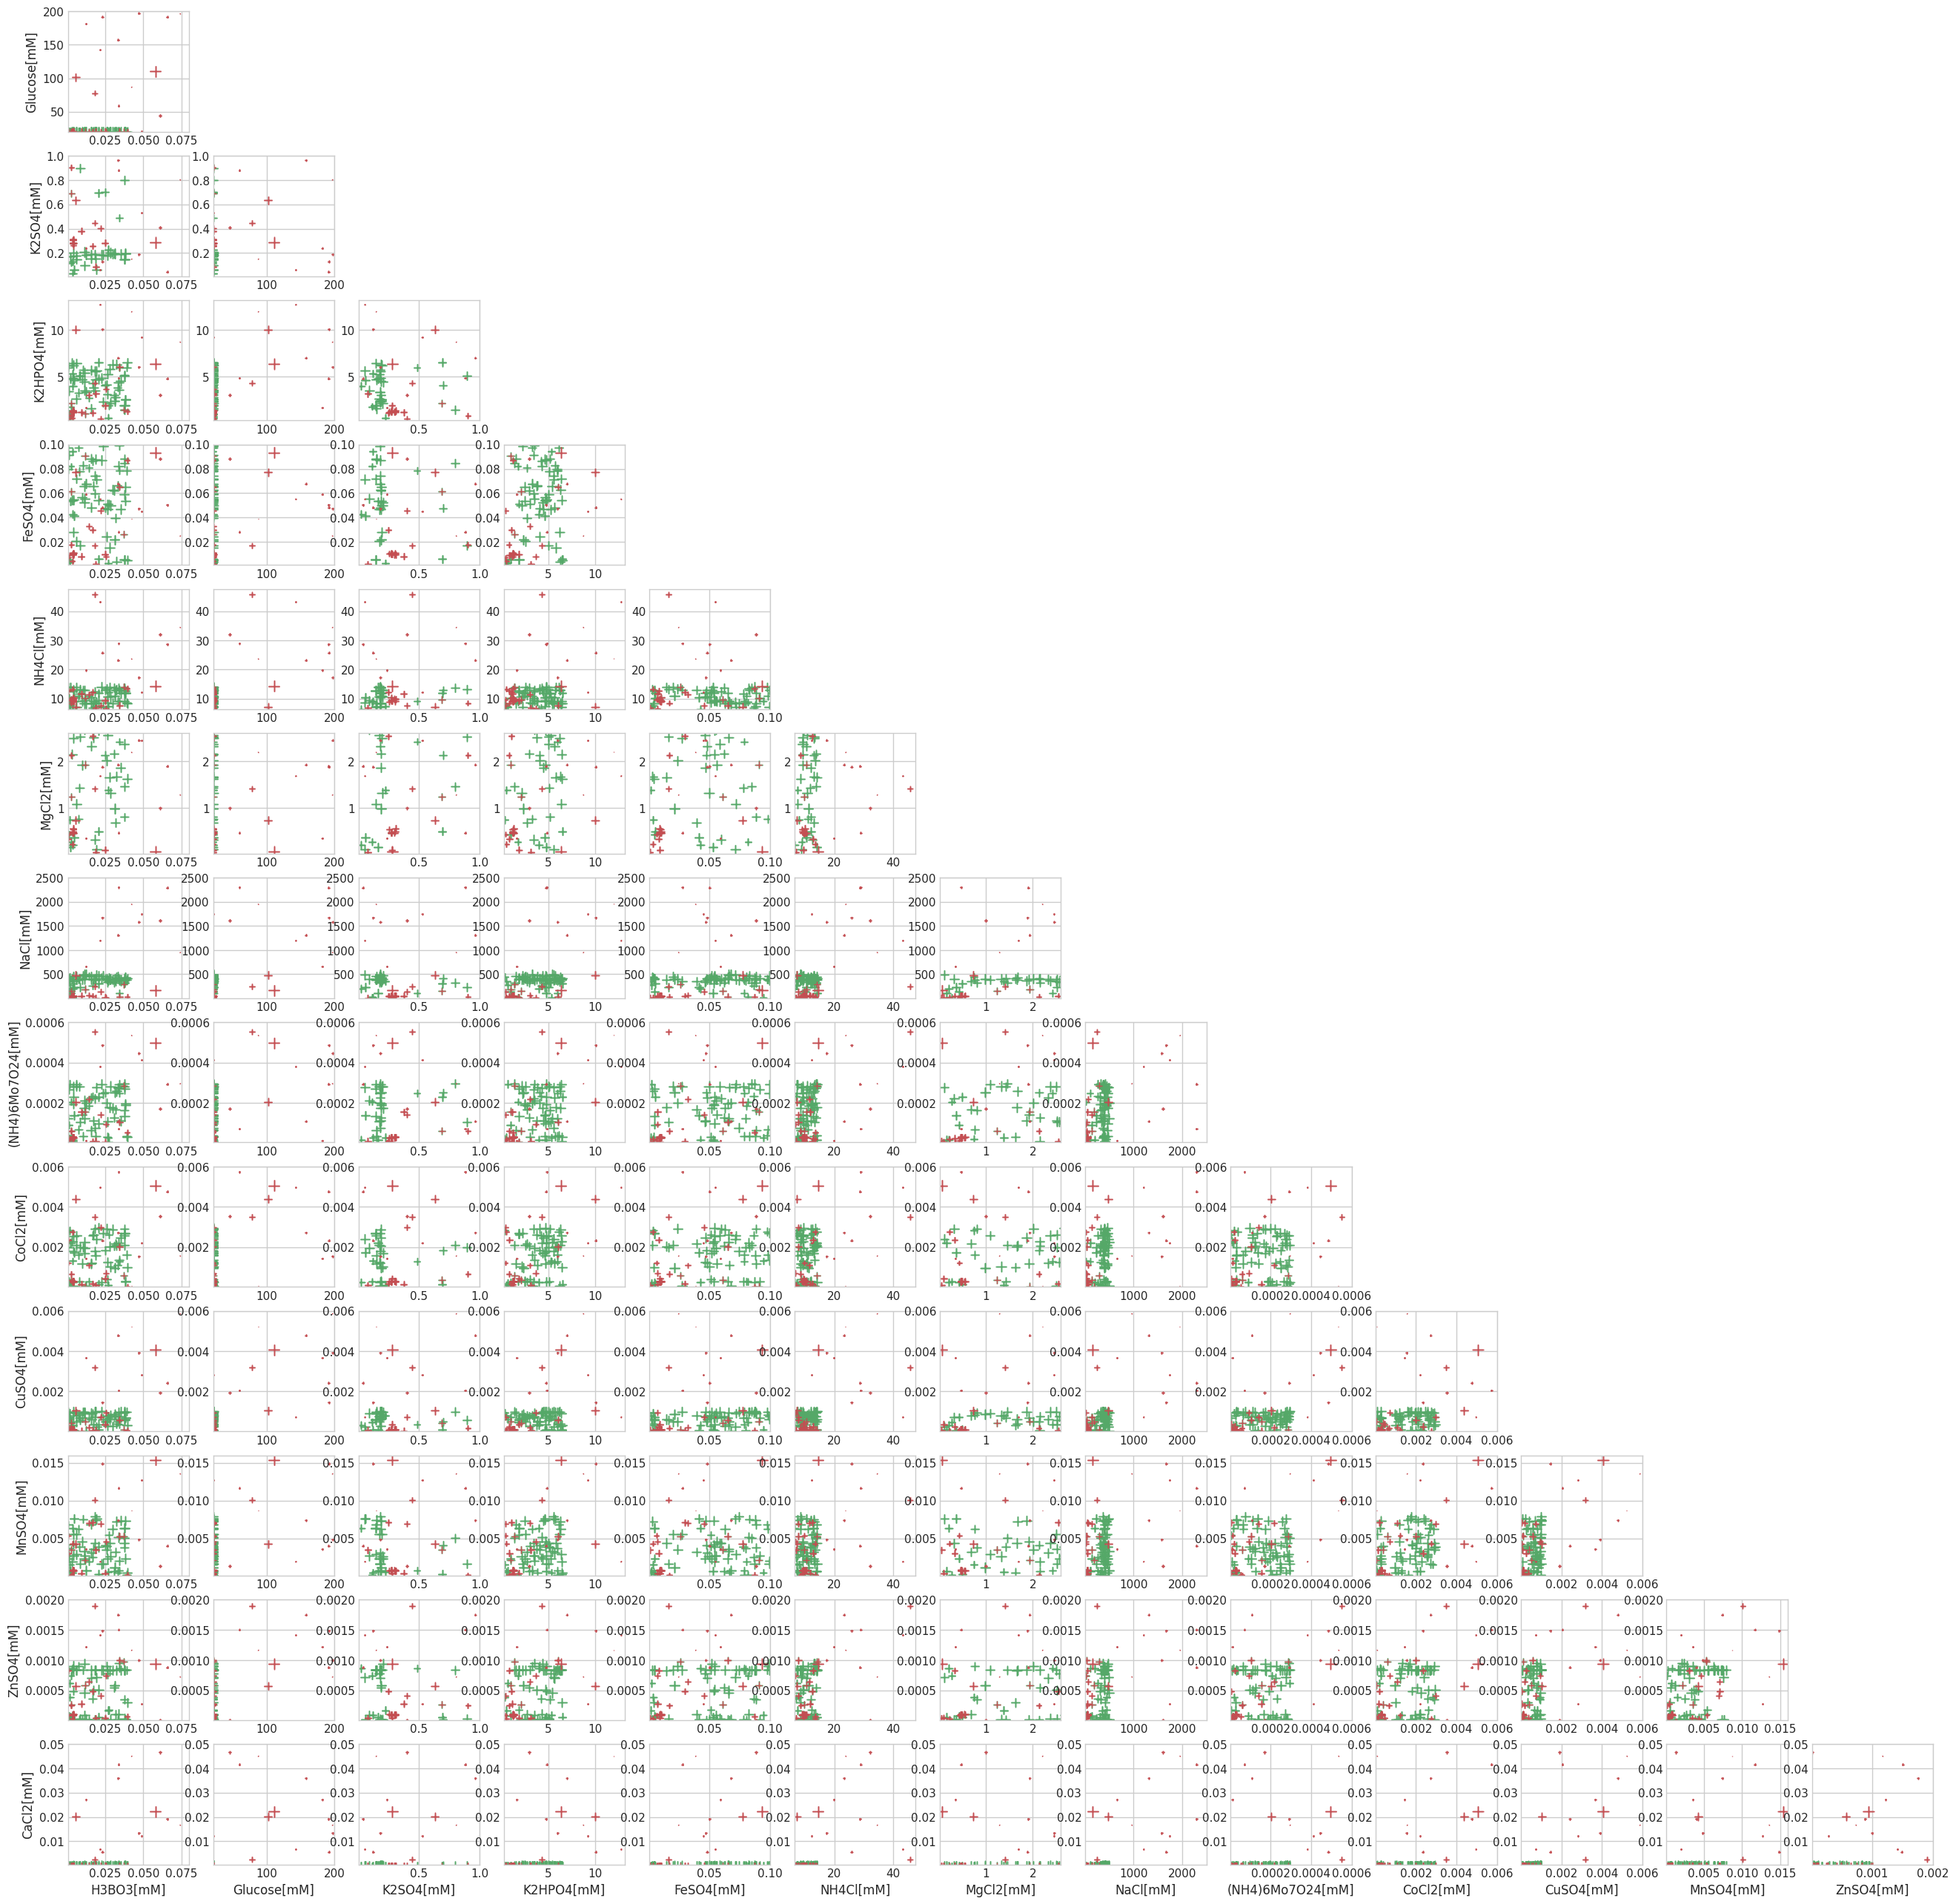

In [130]:
designs_pairwise(df_high, df_low, df_bounds)

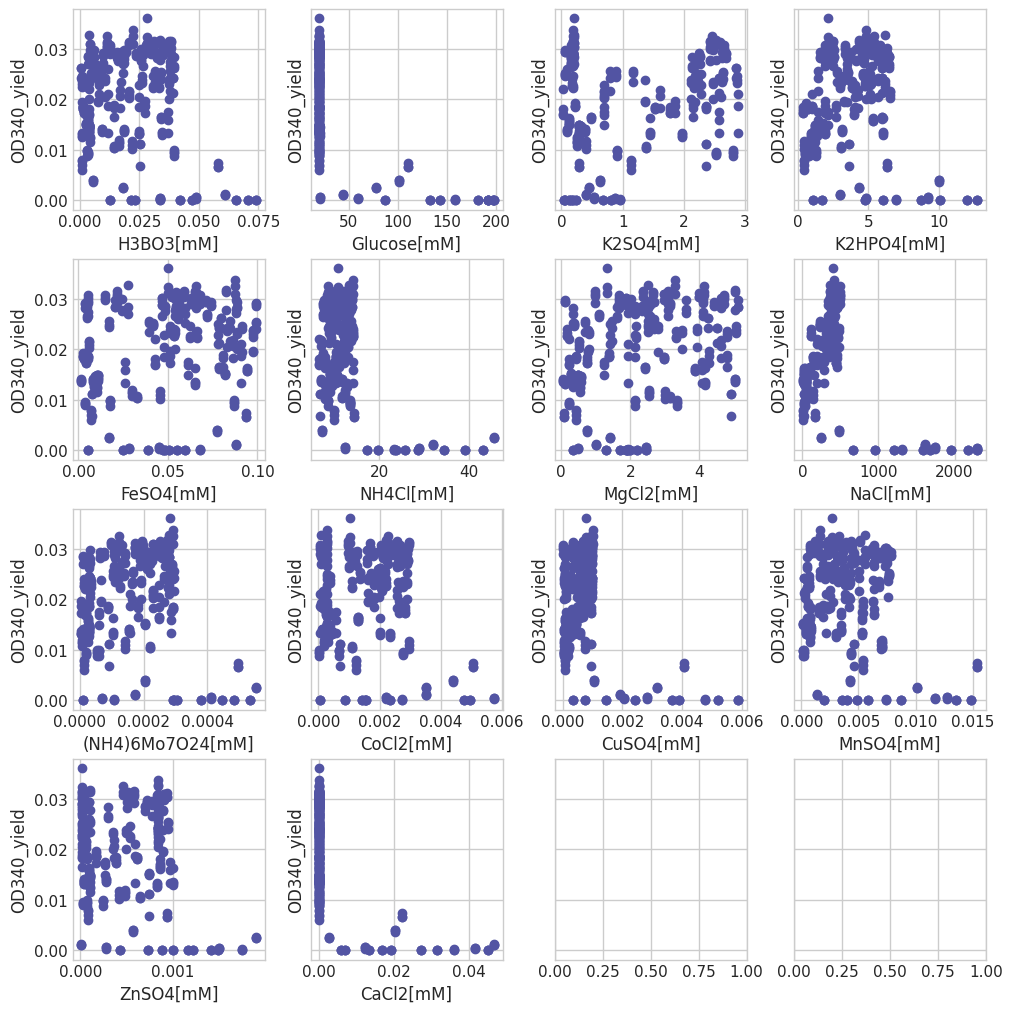

In [131]:
from matplotlib import cm
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(10,10), sharey=True, constrained_layout=True)

cmap_name = 'tab20b'
colors = cm.get_cmap(cmap_name)

components = df_all.columns[:-2]

for component, ax in zip(components, axs.ravel()[:-2]):
    ax.scatter(
        df_all[component], 
        df_all['OD340_yield'], 
        color=colors(1), 
        marker='o', 
        )
    ax.set_xlabel(component)
    ax.set_ylabel('OD340_yield')
    
fig.savefig(
    f'{user_params["output_file_path"]}/Yield_per_component.png',
    bbox_inches="tight",
    transparent=False, 
    dpi=300
)